In [1]:
import pandas as pd

# Load the dataset (update if your file name is different)
df = pd.read_csv(r'C:\Users\MOHSINKHAN\Desktop\Projects\superstoredata\train.csv')

# Show first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# Column names, data types, non-null counts
df.info()

# Basic stats (mean, std, min, max)
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

 Convert Order Date and Ship Date to datetime:

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [12]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [13]:
# Total sales
total_sales = df['Sales'].sum()

# Average sale
average_sales = df['Sales'].mean()

# Max and Min sales
max_sale = df['Sales'].max()
min_sale = df['Sales'].min()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sale: ${average_sales:,.2f}")
print(f"Max Sale: ${max_sale:,.2f}")
print(f"Min Sale: ${min_sale:,.2f}")


Total Sales: $2,261,536.78
Average Sale: $230.77
Max Sale: $22,638.48
Min Sale: $0.44


In [14]:
# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Sales by Customer Segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Display the results
print("Sales by Category:\n", sales_by_category)
print("\nSales by Region:\n", sales_by_region)
print("\nSales by Segment:\n", sales_by_segment)


Sales by Category:
 Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Sales by Region:
 Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

Sales by Segment:
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


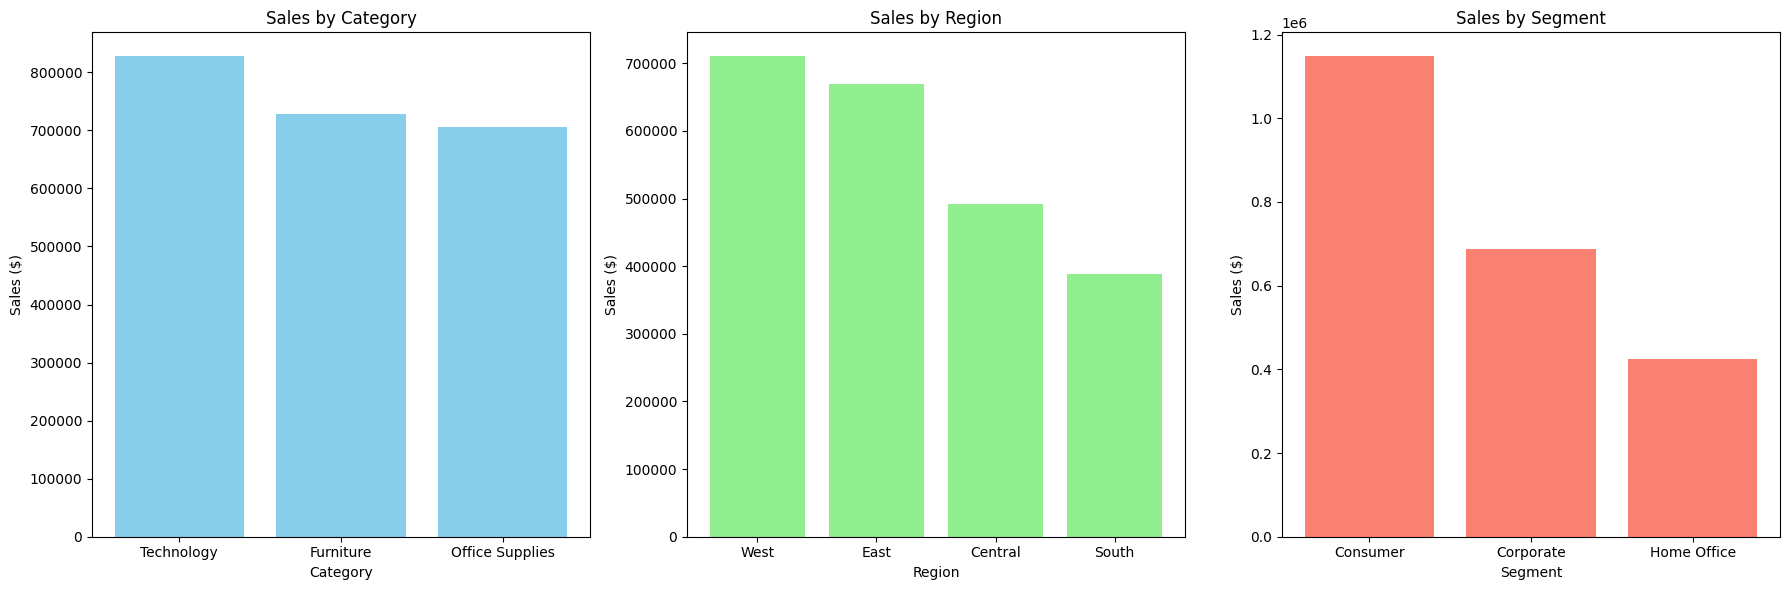

In [15]:
import matplotlib.pyplot as plt

# Set up the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Sales by Category
axs[0].bar(sales_by_category.index, sales_by_category.values, color='skyblue')
axs[0].set_title('Sales by Category')
axs[0].set_ylabel('Sales ($)')
axs[0].set_xlabel('Category')

# Plot Sales by Region
axs[1].bar(sales_by_region.index, sales_by_region.values, color='lightgreen')
axs[1].set_title('Sales by Region')
axs[1].set_ylabel('Sales ($)')
axs[1].set_xlabel('Region')

# Plot Sales by Segment
axs[2].bar(sales_by_segment.index, sales_by_segment.values, color='salmon')
axs[2].set_title('Sales by Segment')
axs[2].set_ylabel('Sales ($)')
axs[2].set_xlabel('Segment')

# Show the plots
plt.tight_layout()
plt.show()


In [16]:
# Extract month and year from the Order Date
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Calculate total sales by month
sales_by_month = df.groupby('Month')['Sales'].sum()

# Calculate total sales by year
sales_by_year = df.groupby('Year')['Sales'].sum()

# Display the results
print("Sales by Month:\n", sales_by_month)
print("\nSales by Year:\n", sales_by_year)


Sales by Month:
 Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

Sales by Year:
 Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64


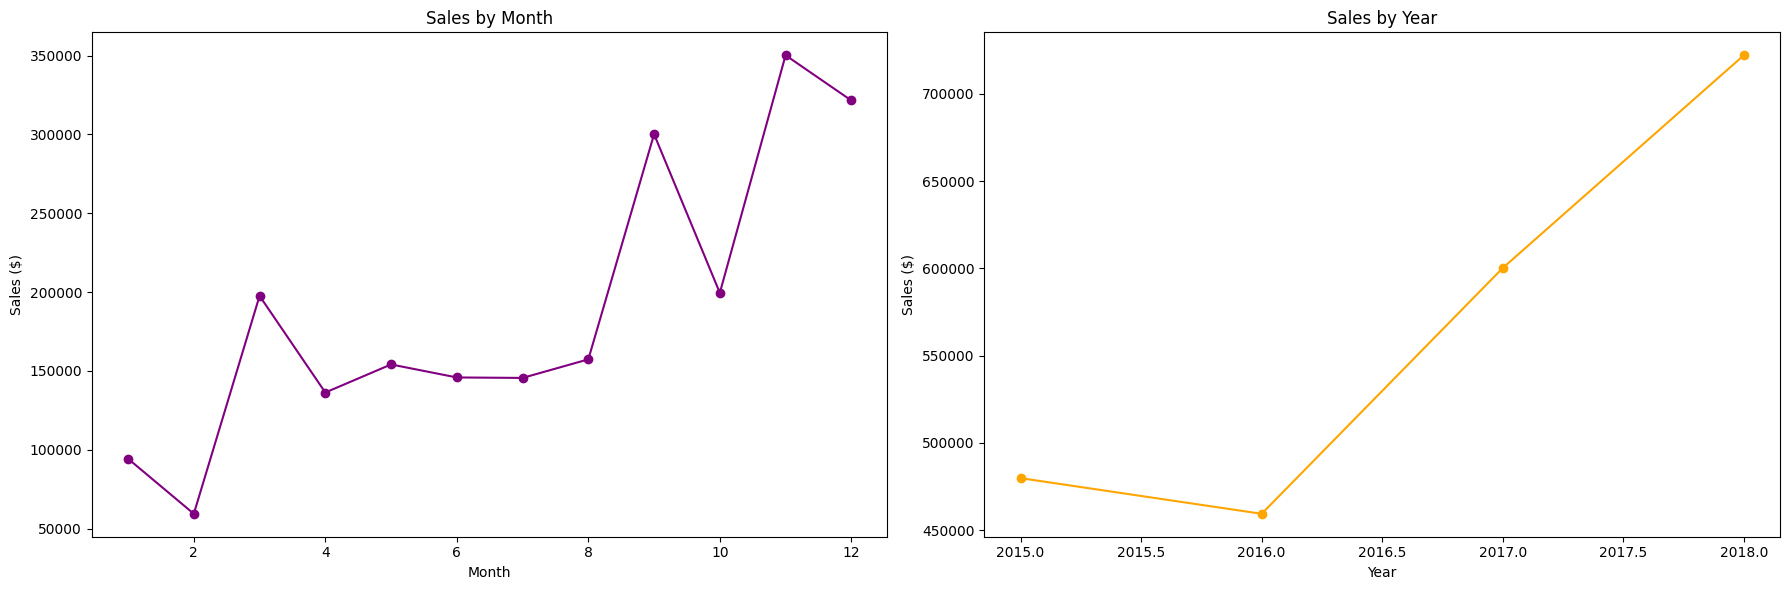

In [17]:
# Set up the plots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot Sales by Month
axs[0].plot(sales_by_month.index, sales_by_month.values, marker='o', color='purple')
axs[0].set_title('Sales by Month')
axs[0].set_ylabel('Sales ($)')
axs[0].set_xlabel('Month')

# Plot Sales by Year
axs[1].plot(sales_by_year.index, sales_by_year.values, marker='o', color='orange')
axs[1].set_title('Sales by Year')
axs[1].set_ylabel('Sales ($)')
axs[1].set_xlabel('Year')

# Show the plots
plt.tight_layout()
plt.show()


In [18]:
# Filter high-value orders (e.g., greater than $10K)
high_value_orders = df[df['Sales'] > 10000]

# Check the number and details of high-value orders
high_value_orders_info = high_value_orders[['Order ID', 'Sales', 'Category', 'Region', 'Segment']]

print(high_value_orders_info.head())  # Show first 5 high-value orders


            Order ID      Sales    Category   Region      Segment
2623  CA-2018-127180  11199.968  Technology     East  Home Office
2697  CA-2015-145317  22638.480  Technology    South  Home Office
4190  CA-2018-166709  10499.970  Technology     East     Consumer
6826  CA-2017-118689  17499.950  Technology  Central    Corporate
8153  CA-2018-140151  13999.960  Technology     West     Consumer


In [19]:
# Remove high-value orders (Sales > 10K)
df_no_high_value = df[df['Sales'] <= 10000]

# Recalculate total sales, average, max, and min without high-value orders
total_sales_no_high = df_no_high_value['Sales'].sum()
avg_sale_no_high = df_no_high_value['Sales'].mean()
max_sale_no_high = df_no_high_value['Sales'].max()
min_sale_no_high = df_no_high_value['Sales'].min()

print(f"Total Sales (Excluding High Value Orders): ${total_sales_no_high:,.2f}")
print(f"Average Sale (Excluding High Value Orders): ${avg_sale_no_high:,.2f}")
print(f"Max Sale (Excluding High Value Orders): ${max_sale_no_high:,.2f}")
print(f"Min Sale (Excluding High Value Orders): ${min_sale_no_high:,.2f}")


Total Sales (Excluding High Value Orders): $2,185,698.45
Average Sale (Excluding High Value Orders): $223.14
Max Sale (Excluding High Value Orders): $9,892.74
Min Sale (Excluding High Value Orders): $0.44


In [20]:
# Calculate total sales by Customer ID
sales_by_customer = df.groupby('Customer ID')['Sales'].sum()

# Get the top 10 customers by sales
top_customers = sales_by_customer.sort_values(ascending=False).head(10)

print("Top 10 Customers by Sales:\n", top_customers)


Top 10 Customers by Sales:
 Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
KL-16645    14175.229
SC-20095    14142.334
HL-15040    12873.298
SE-20110    12209.438
CC-12370    12129.072
Name: Sales, dtype: float64


In [21]:
# Calculate total sales by segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()

print("Sales by Segment:\n", sales_by_segment)


Sales by Segment:
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


In [22]:
# Calculate total sales by region
sales_by_region = df.groupby('Region')['Sales'].sum()

print("Sales by Region:\n", sales_by_region)


Sales by Region:
 Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [23]:
# Calculate total sales by category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Calculate total sales by sub-category
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()

print("Sales by Category:\n", sales_by_category)
print("\nSales by Sub-Category:\n", sales_by_subcategory)


Sales by Category:
 Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

Sales by Sub-Category:
 Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64


In [24]:
# Calculate total sales by customer segment
sales_by_customer_segment = df.groupby('Segment')['Sales'].sum()

print("Sales by Customer Segment:\n", sales_by_customer_segment)


Sales by Customer Segment:
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


In [25]:
# Extract year and month from Order Date for time analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Calculate total sales by year
sales_by_year = df.groupby('Order Year')['Sales'].sum()

# Calculate total sales by month
sales_by_month = df.groupby('Order Month')['Sales'].sum()

print("Sales by Year:\n", sales_by_year)
print("\nSales by Month:\n", sales_by_month)


Sales by Year:
 Order Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

Sales by Month:
 Order Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64


In [31]:
# Check available columns
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month', 'Year', 'Order Year', 'Order Month',
       'Profit'],
      dtype='object')


In [32]:
# Calculate total profit by category
profit_by_category = df.groupby('Category')['Profit'].sum()

print("Profit by Category:\n", profit_by_category)


Profit by Category:
 Category
Furniture          291463.43028
Office Supplies    282168.93360
Technology         330982.34920
Name: Profit, dtype: float64


In [33]:
# Calculate total profit by region
profit_by_region = df.groupby('Region')['Profit'].sum()

print("Profit by Region:\n", profit_by_region)


Profit by Region:
 Region
Central    197058.76528
East       267807.49040
South      155660.58360
West       284087.87380
Name: Profit, dtype: float64


In [34]:
# Calculate total profit by segment
profit_by_segment = df.groupby('Segment')['Profit'].sum()

print("Profit by Segment:\n", profit_by_segment)


Profit by Segment:
 Segment
Consumer       459224.21240
Corporate      275397.62992
Home Office    169992.87076
Name: Profit, dtype: float64


In [35]:
# Calculate correlation between Sales and Profit
correlation = df['Sales'].corr(df['Profit'])
print("Correlation between Sales and Profit:", correlation)


Correlation between Sales and Profit: 1.0


In [36]:
# Find top 10 products by sales
top_products_by_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:\n", top_products_by_sales)


Top 10 Products by Sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [37]:
# Calculate total sales and profit by year
sales_by_year = df.groupby('Year')['Sales'].sum()
profit_by_year = df.groupby('Year')['Profit'].sum()

print("Sales by Year:\n", sales_by_year)
print("Profit by Year:\n", profit_by_year)


Sales by Year:
 Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64
Profit by Year:
 Year
2015    191942.48324
2016    183774.40216
2017    240077.02000
2018    288820.80768
Name: Profit, dtype: float64


In [38]:
# Calculate customer lifetime value (CLV)
clv = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)
print("Customer Lifetime Value (CLV):\n", clv)


Customer Lifetime Value (CLV):
 Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
              ...    
MG-18205       16.739
CJ-11875       16.520
SC-20845       14.112
LD-16855        5.304
TS-21085        4.833
Name: Sales, Length: 793, dtype: float64


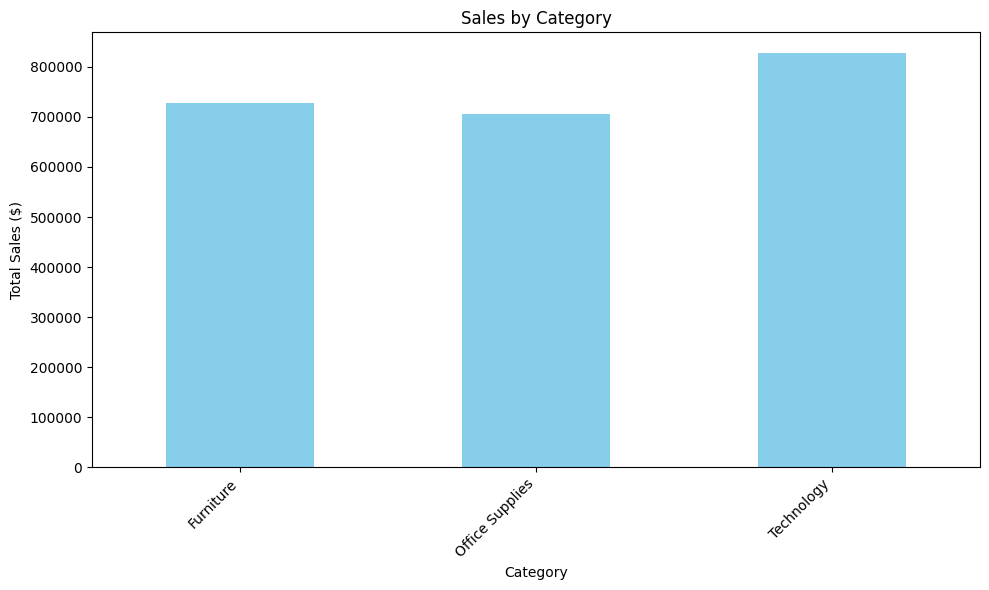

In [39]:
import matplotlib.pyplot as plt

# Sales by Category Bar Plot
sales_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sales by Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


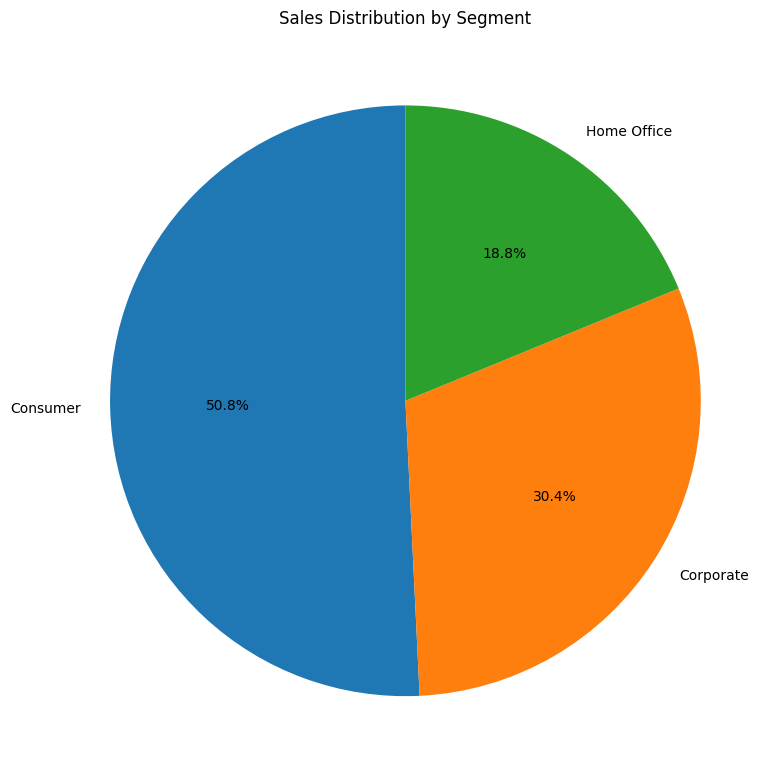

In [40]:
# Sales by Segment Pie Chart
sales_by_segment.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Sales Distribution by Segment')
plt.ylabel('')  # Hide the ylabel for better appearance
plt.tight_layout()
plt.show()


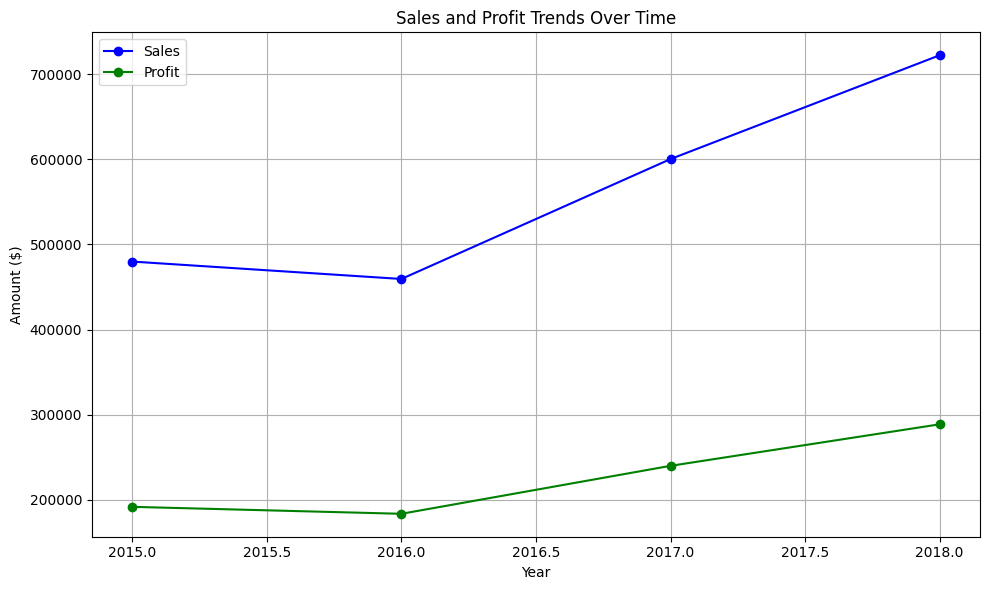

In [41]:
# Group by Year and calculate Total Sales and Profit
sales_by_year = df.groupby('Year')['Sales'].sum()
profit_by_year = df.groupby('Year')['Profit'].sum()

# Sales and Profit Line Plot
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, label='Sales', marker='o', color='b')
plt.plot(profit_by_year.index, profit_by_year.values, label='Profit', marker='o', color='g')
plt.title('Sales and Profit Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


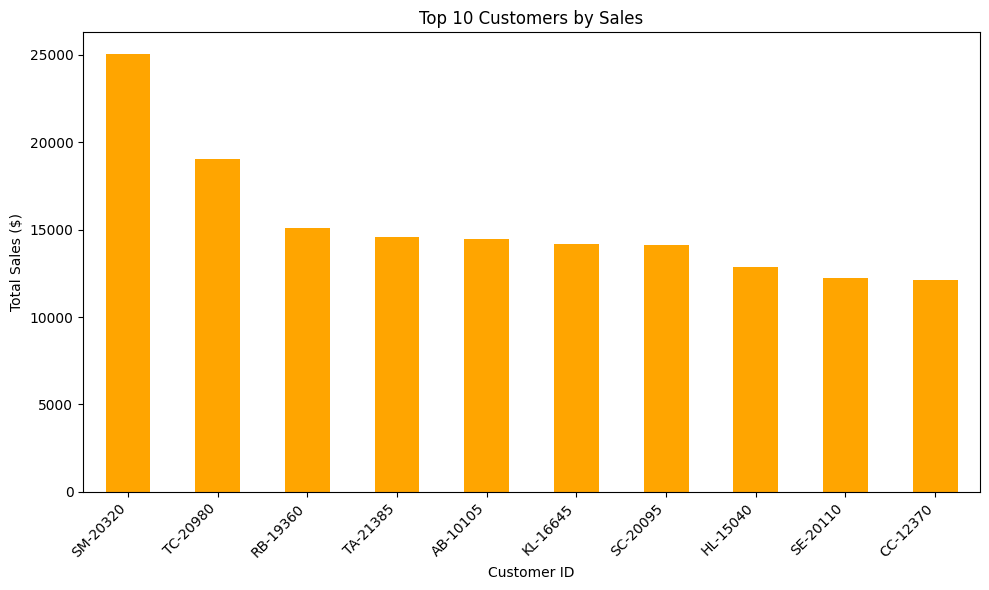

In [42]:
# Top 10 Customers by Sales
top_customers = df.groupby('Customer ID')['Sales'].sum().nlargest(10)

# Top 10 Customers Bar Plot
top_customers.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Customers by Sales')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


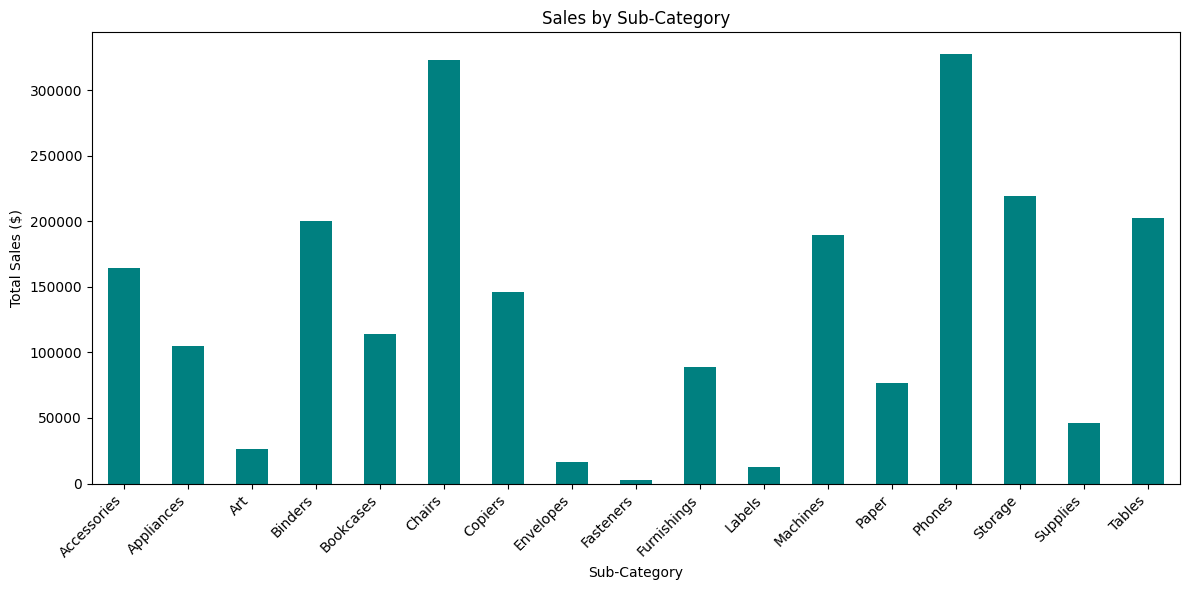

In [43]:
# Sales by Sub-Category Bar Plot
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()
sales_by_subcategory.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Sales by Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
